<a href="https://colab.research.google.com/github/eugemoris/Procesamiento_de_imagenes/blob/main/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from PIL import Image,ImageFilter  
import matplotlib.pyplot as plt
import numpy as np

#inline

In [34]:
#matrices que nos permiten pasarnos a los distintos espacios vectoriales
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

In [35]:
def read_img(path):
    '''obtengo imagen desde una ruta dada'''
    img = Image.open(path) 
    return img

def save_img(path,img):
    ''' guardo al imagen en una ruta dada'''
    img = img.save(path)

def img2arr(img):
    ''' paso la imagen a matriz'''
    img_arr = np.asarray(img)
    return img_arr

def arr2img(img_arr):
    '''transformo la matriz en un objeto imagen'''
    img = Image.fromarray(np.uint8(img_arr))
    return img

def norm_Img(arrimg):
    ''' normalizo los datos de una array'''
    arr_norm = arrimg/255
    return arr_norm

def rgb2yml(arr_img):
    result = np.dot(arr_img, RGB2YIQ.transpose())
    return result

def yiq2rgb(arr_img):
    OrigShape=arr_img.shape
    return np.dot(arr_img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)

def change_y(arr_img, alfa):
    arr_img[:,:,0] = arr_img[:,:,0] * alfa  
    return arr_img

def change_i(arr_img, beta):
    arr_img[:,:,1] = arr_img[:,:,1] * beta  
    return arr_img

def change_q(arr_img, beta):
    arr_img[:,:,2] = arr_img[:,:,2] * beta  
    return arr_img

In [74]:
def limits_verification(arr):

  min_y = np.min(arr[:,:,0])
  max_y = np.max(arr[:,:,0])
  
  min_i = np.min(arr[:,:,1])
  max_i = np.max(arr[:,:,1])

  min_q = np.min(arr[:,:,2])
  max_q = np.max(arr[:,:,2])

  print('Y value - MIN: ', min_y , 'MAX: ', max_y)
  print('I value - MIN: ', min_i, 'MAX: ', max_i)
  print('Q value - MIN: ', min_q, 'MAX: ', max_q)

  if (max_y > 1):
    print('Y NO ES MENOS A 1')
  if (min_i < -0.5957) or (max_i > 0.5957):
    print('I SE VA DE RANGO')
  if (min_q < -0.5226) or (max_q > 0.5226):
    print('Q SE VA DE RANGO')



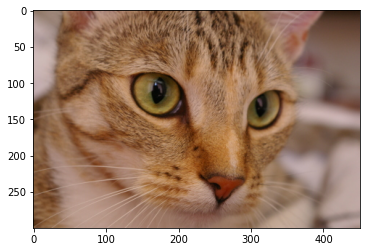

In [37]:
from skimage import data

#obtengo imagen para trabajar
cat = data.chelsea()
img = Image.fromarray(cat)
plt.imshow(img, cmap='inferno')
plt.show()



Y value - MIN:  0.007396078431372548 MAX:  0.3806941176470588
I value - MIN:  -0.07002204571764707 MAX:  0.17947565283529407
Q value - MIN:  -0.049586800584313744 MAX:  0.038224894729411756


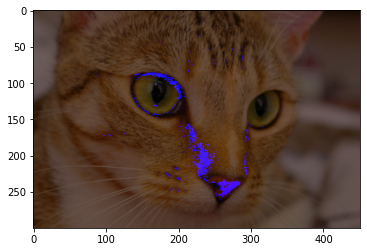

In [81]:
#@title Change the image in YIQ {run:"auto"}

def plot(arr_img,alfa, beta, img):
  #tranformo la imagen en un arreglo de ancho x alto x RGB
  img_arr = img2arr(img)

  #normalizo
  arr_img = norm_Img(img_arr)

  #paso a YIQ
  arr_img = rgb2yml(arr_img)
  #cambio valores de Y, I, Q
  arr_img = change_y(arr_img,alfa)

  arr_img = change_i(arr_img,beta)

  arr_img = change_q(arr_img,beta)

  #compruebo los limites de la imagen
  limits_verification(arr_img) 
 
  #vuelvo la imagen a RGB
  arr_img = yiq2rgb(arr_img)

  #desnormalizo 
  arr_img = arr_img * 255

  #paso el arreglo a imagen
  img = arr2img(arr_img)
  plt.imshow(img)
  

alfa = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
beta = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

plot(arr_img,alfa,beta,img)